In [1]:
! nvidia-smi

Tue Apr  8 09:49:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H200                    On  |   00000000:DB:00.0 Off |                    0 |
| N/A   31C    P0             80W /  700W |       1MiB / 143771MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
# import os
# print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))
# os.environ["CUDA_VISIBLE_DEVICES"] = "5"
# print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))


In [3]:
import few
for backend in ["cpu", "cuda11x", "cuda12x", "cuda", "gpu"]:
    print(f" - Backend '{backend}': {"available" if few.has_backend(backend) else "unavailable"}")

 - Backend 'cpu': available
 - Backend 'cuda11x': unavailable
 - Backend 'cuda12x': available
 - Backend 'cuda': available
 - Backend 'gpu': available


In [4]:
# import few
# cfg_set = few.get_config_setter(reset=True)
# # cfg_set.enable_backends("cpu")

In [5]:
from few.amplitude.ampinterp2d import AmpInterpKerrEccEq
# from few.amplitude.ampinterp2d import AmpInterpKerrEqEcc

from bhpwave.waveform import KerrWaveform
from bhpwave.harmonics.amplitudes import HarmonicAmplitudes
import numpy as np
import matplotlib.pyplot as plt
from few.utils.utility import get_separatrix



amp_BHPWave = HarmonicAmplitudes()
amp_Kerr_ecc = AmpInterpKerrEccEq()
# amp_Kerr_ecc = AmpInterpKerrEqEcc()



latex_setting = {'text.usetex': True,
        'font.family': 'serif',
        'font.serif': 'cmr10',
        'font.weight':'medium',
        'mathtext.fontset': 'cm',
        'text.latex.preamble': r"\usepackage{amsmath}",
        # 'font.size': 14,
        # 'figure.figsize': (7, 7),
        # 'figure.titlesize': 'large',
        'axes.formatter.use_mathtext': True,
        # 'axes.formatter.limits': [-2, 4],
        # 'axes.titlesize': 'large',
        # 'axes.labelsize': 'large',
        'xtick.top': True,
        # 'xtick.major.size': 5,
        # 'xtick.minor.size': 3,
        # 'xtick.major.width': 0.8,
        # 'xtick.minor.visible': True,
        'xtick.direction': 'in',
        # 'xtick.labelsize': 'medium',
        'ytick.right': True,
        # 'ytick.major.size': 5,
        # 'ytick.minor.size': 3,
        # 'ytick.major.width': 0.8,
        # 'ytick.minor.visible': True,
        'ytick.direction': 'in',
        # 'ytick.labelsize': 'medium',
        # 'legend.frameon': True,
        # 'legend.framealpha': 1,
        # 'legend.fontsize': 'medium',
        # 'legend.scatterpoints' : 3,
        #'lines.color': 'k',
        # 'lines.linewidth': 2,
        # 'patch.linewidth': 1,
        # 'hatch.linewidth': 1,
        # 'grid.linestyle': 'dashed',
        'grid.linewidth' : 0.3,
        # 'savefig.dpi' : 200,
        # 'savefig.format' : 'pdf',
        # 'savefig.bbox' : 'tight',
        'savefig.transparent' : True,
    }

plt.rcParams.update(latex_setting)


In [6]:
# a, p, e, xI, nsamples = (0.0, 10.0, 0.0, 1.0, 2**8)
# a0 = np.array([a])
# e = np.array([e])
# xI = np.array([xI])
# ps = get_separatrix(a,e, xI)
# p = np.linspace(ps+0.5, 40.0, 200)
# a_all, p_all, e_all, xI_all = np.asarray([temp.ravel() for temp in np.meshgrid(a, p, e, xI)])
# teuk_modes_Kerr = amp_Kerr_ecc(a, p_all, e_all, xI_all)
# teuk_modes_Kerr.shape

(600,)
min p_all 6.0305 max p_all 40.0
min p_KerrCirc 6.0305 max p_KerrCirc 40.0
min p_KerrCirc 6.0305 max p_KerrCirc 40.0
min p_KerrCirc 6.0305 max p_KerrCirc 40.0
(600,)
min p_all 2.351383042 max p_all 40.0
min p_KerrCirc 2.351383042 max p_KerrCirc 40.0
min p_KerrCirc 2.351383042 max p_KerrCirc 40.0
min p_KerrCirc 2.351383042 max p_KerrCirc 40.0
(600,)
min p_all 1.484997938 max p_all 40.0
min p_KerrCirc 1.484997938 max p_KerrCirc 40.0
min p_KerrCirc 1.484997938 max p_KerrCirc 40.0
min p_KerrCirc 1.484997938 max p_KerrCirc 40.0


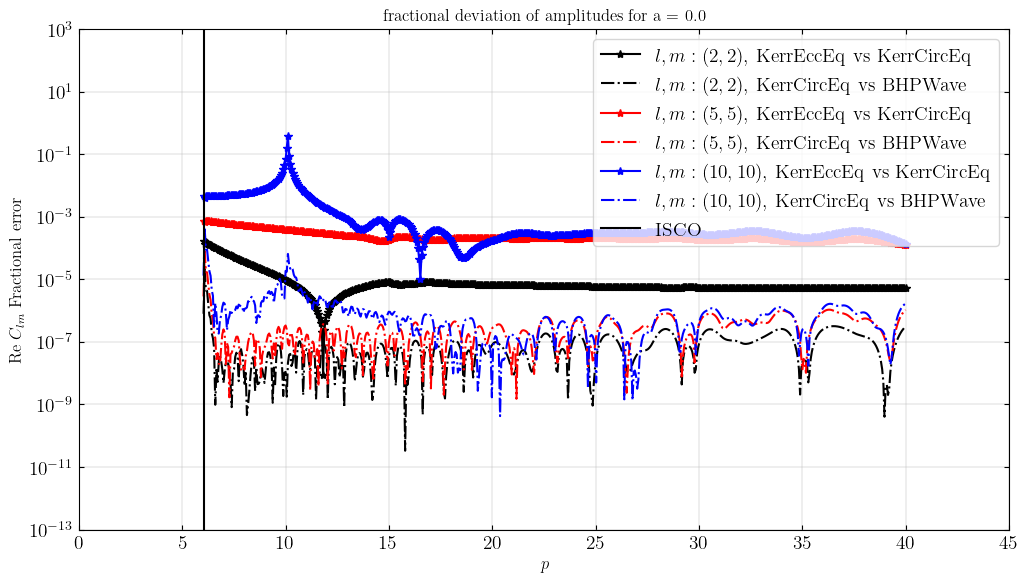

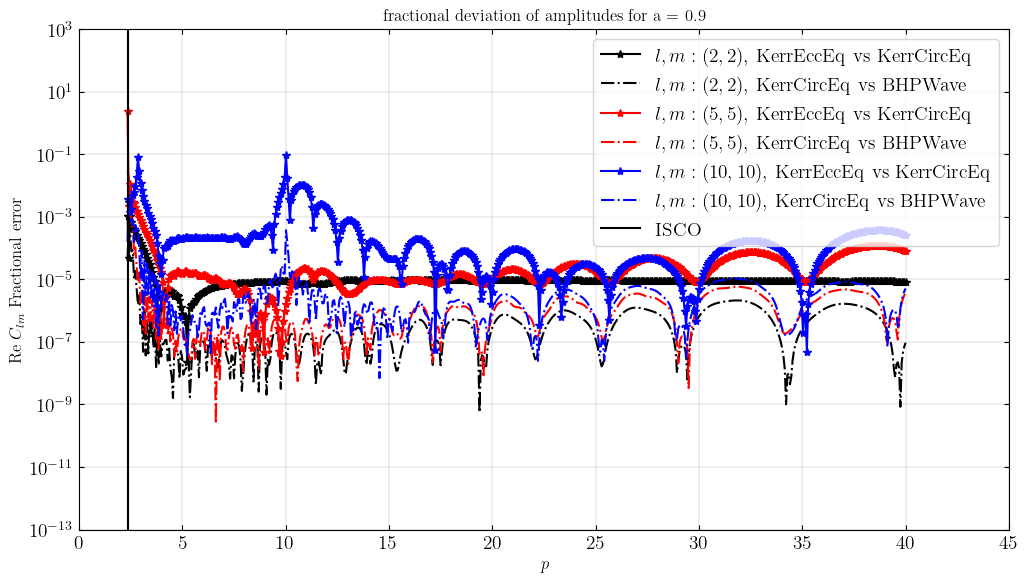

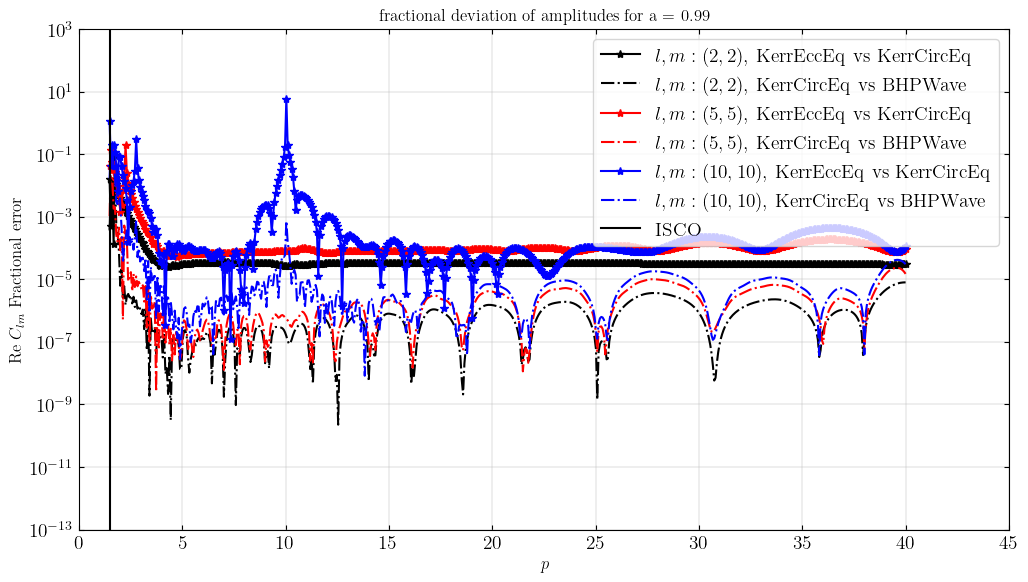

In [35]:
path_amp_plots = "/home/hkhalvati//Downloads/FastEMRIWaveforms-Soton-Hackathon-2025/KerrEquatorialCodes/Cross_tests/"
title_fontsize = 20
label_fontsize = 12
tick_fontsize = 14
legend_fontsize = 14
text_fontsize = 12

a, p, e, x, nsamples = (0.0, 10.0, 0.0, 1.0, 2**8)
# p = 6.1
# a0 = np.linspace(0.0, 99.0)

a0 = np.array([a])
# p = np.array([p])
e = np.array([e])
xI = np.array([x])


a0 = [0.0,0.9,0.99]
lm_list = [(2,2),(5,5),(10,10)]

s = [":", "--", "-"]
# c = ["k", 'r', 'b']
c = ["k", "r", "b","orange", "purple", "green", "darkred", "darkslategray", "yellow", "k", "r", "b", "purple", "orange", "green", "darkred", "darkslategray", "yellow"]


KerrCirc_data =  np.loadtxt(path_amp_plots + "Amplitudes_Has.txt")
l_KerrCirc = KerrCirc_data[:,0]
m_KerrCirc = KerrCirc_data[:,1]
a_KerrCirc = KerrCirc_data[:,2]
p_KerrCirc = KerrCirc_data[:,3]
C_real_KerrCirc = KerrCirc_data[:,4]
C_imag_KerrCirc = KerrCirc_data[:,5]


for i,a in enumerate(a0):
    plt.figure(figsize = (12,6.5))
    mask_H = (a_KerrCirc == a)
    p = np.unique(p_KerrCirc[mask_H])
    ps = np.min(p)
    print(np.shape(p))
    # ps = get_separatrix(a,e, x)
    # p = np.linspace(ps+0.0305, 40.0, 600)
    a_all, p_all, e_all, xI_all = np.asarray([temp.ravel() for temp in np.meshgrid(a, p, e, xI)])
    print("min p_all", np.min(p_all), "max p_all", np.max(p_all))
    teuk_modes_Kerr = amp_Kerr_ecc(a, p_all, e_all,  xI_all)
    style = s[i]
    for j, (l,m) in enumerate(lm_list):
        modes_Kerr = teuk_modes_Kerr[:, amp_Kerr_ecc.special_index_map[(l,m,0)]] #Kerr case
        modes_Kerr = modes_Kerr.get()
        zach_modes_Kerr = amp_BHPWave(l,m,a_all,p_all)
        modes_Kerr = modes_Kerr.real
        zach_modes_Kerr = zach_modes_Kerr.real

        # mask Has's data from the saved file
        mask = (l_KerrCirc == l) & (m_KerrCirc == m) & (a_KerrCirc == a)
        print("min p_KerrCirc", np.min(p_KerrCirc[mask]), "max p_KerrCirc", np.max(p_KerrCirc[mask]))
        modes_KerrCirc = (C_real_KerrCirc[mask] + 1j*C_imag_KerrCirc[mask])
        modes_KerrCirc = modes_KerrCirc.real
        frac_err_KerrEcc_KerrCirc = abs((modes_KerrCirc - modes_Kerr) / modes_Kerr)
        frac_err_KerrCirc_BHPWave = abs((modes_KerrCirc - zach_modes_Kerr) / modes_KerrCirc)
        frac_err_KerrEcc_BHPWave = abs((zach_modes_Kerr - modes_Kerr) / modes_Kerr)


        ## Plot the amplitudes 
        # plt.plot(p_KerrCirc[mask],abs(C_real_KerrCirc[mask]), "--k", label = f"$l,m:({l},{m})$, Has")
        # plt.plot(p_all,abs(zach_modes_Kerr), "--b",label= f"l,m:({l},{m}), Zach")#"Re part of A22 for a=e=0")
        # plt.plot(p_all,abs(modes_Kerr), "--r",label= f"l,m:({l},{m}), Kerr_ecc")#"Re part of C22 for a=e=0")
        n_skip = 1
        plt.plot(p_all[::n_skip],frac_err_KerrEcc_KerrCirc[::n_skip], '-*', color = c[j], label = f"$l,m:({l},{m})$, KerrEccEq vs KerrCircEq", rasterized = True)# and a = {a}")
        # plt.plot(p_all[::n_skip],frac_err_KerrEcc_BHPWave[::n_skip],marker='o', linestyle='None', markerfacecolor='none', color = c[j], label = f"$l,m:({l},{m})$, KerrEccEq vs BHPWave")# and a = {a}")
        plt.plot(p_all[::n_skip],frac_err_KerrCirc_BHPWave[::n_skip], '-.', color = c[j], label = f"$l,m:({l},{m})$, KerrCircEq vs BHPWave", rasterized = True)# and a = {a}")

        
        plt.yscale("log")   
        plt.ylabel(r"$ \mathrm{Re} \ C_{lm}$ Fractional error", fontsize = label_fontsize)
        plt.xlabel("$p$", fontsize = label_fontsize)
        # plt.ylim(-3e-6,8e-6)
    plt.title(f"fractional deviation of amplitudes for a = {a}")
    plt.xlim(0,45)
    plt.ylim(1e-13,1e3)
    plt.axvline(ps, color = 'k' ,label=f"ISCO")
    plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    plt.grid()
    plt.legend(loc = "upper right",fontsize = legend_fontsize)

    # plt.savefig(path_amp_plots + f"amp_err_a{a}_V2.pdf", transparent=False)



(array([1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03]),
 [Text(0, 1e-11, '$\\mathdefault{10^{-11}}$'),
  Text(0, 1e-09, '$\\mathdefault{10^{-9}}$'),
  Text(0, 1e-07, '$\\mathdefault{10^{-7}}$'),
  Text(0, 9.999999999999999e-06, '$\\mathdefault{10^{-5}}$'),
  Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$')])

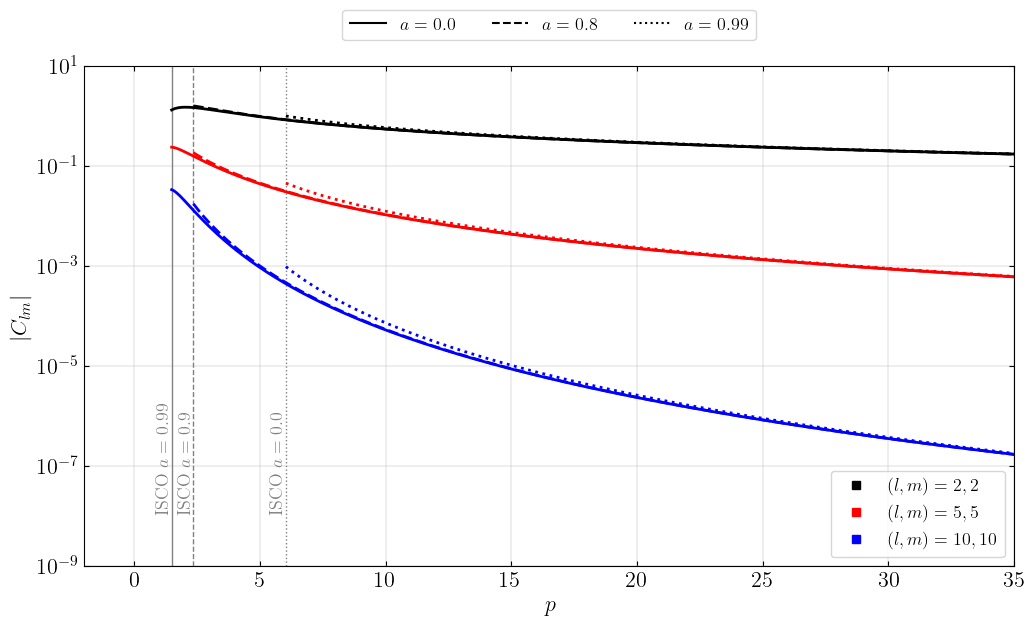

In [13]:
path_amp_plots = "/home/hkhalvati//Downloads/FastEMRIWaveforms-Soton-Hackathon-2025/KerrEquatorialCodes/Cross_tests/"
import matplotlib.lines as mlines

tick_size = 16
label_size = 16
legend_size = 13
# title_size = 20
plunge_label_size = 10  # Example for custom plunge limit label
thick_isco = 1
thick_plots = 2

a, p, e, x, nsamples = (0.0, 10.0, 0.0, 1.0, 2**8)
# p = 6.1
# a0 = np.linspace(0.0, 99.0)

a0 = np.array([a])
# p = np.array([p])
e = np.array([e])
xI = np.array([x])





a0 = [0.0,0.9,0.99]
lm_list = [(2,2),(5,5),(10,10)]


s = [":", "--", "-"]
# c = ["k", 'r', 'b']
c = ["k", "r", "b","orange", "purple", "green", "darkred", "darkslategray", "yellow", "k", "r", "b", "purple", "orange", "green", "darkred", "darkslategray", "yellow"]



KerrCirc_data =  np.loadtxt(path_amp_plots + "Amplitudes_Has.txt")
l_Has = KerrCirc_data[:,0]
m_Has = KerrCirc_data[:,1]
a_Has = KerrCirc_data[:,2]
p_Has = KerrCirc_data[:,3]
C_real_Has = KerrCirc_data[:,4]
C_imag_Has = KerrCirc_data[:,5]



thick_plots = 2
plt.figure(figsize = (12,6.5))
for i,a in enumerate(a0):
    # ps = get_separatrix(a,e, x)
    # p = np.linspace(ps+0.0305, 40.0, 600)
    mask_H = (a_KerrCirc == a)
    p = np.unique(p_KerrCirc[mask_H])
    ps = np.min(p)
    a_all, p_all, e_all, xI_all = np.asarray([temp.ravel() for temp in np.meshgrid(a, p, e, xI)])
    teuk_modes_Kerr = amp_Kerr_ecc(a, p_all, e_all,  xI_all)
    style = s[i]
    plt.axvline(ps ,linestyle=s[i],linewidth=thick_isco, color = 'grey' ,label=f"plunge limit p:{ps}")
    plt.text(ps, 1e-8, f"ISCO $a = {a}$", color='grey', fontsize=legend_size, verticalalignment='bottom', horizontalalignment='right', rotation=90)
    for j, (l,m) in enumerate(lm_list):
        modes_Kerr = teuk_modes_Kerr[:, amp_Kerr_ecc.special_index_map[(l,m,0)]] #Kerr case
        modes_Kerr = modes_Kerr.get()
        modes_Kerr = abs(modes_Kerr)
        plt.plot(p_all,modes_Kerr,s[i], color=c[j], linewidth = thick_plots,label=f"$a = {a}, l,m = {l},{m}$")
    

plt.yscale("log")
# plt.ylabel(r"$\mathrm{Re} \ C_{lm}$", fontsize=label_size)
plt.ylabel(r"$|C_{lm}|$", fontsize=label_size)
plt.xlabel("$p$", fontsize=label_size)
# plt.title("Amplitudes vs separation for different spin values", fontsize=title_size)
plt.xlim(-2, 35)
plt.ylim(1e-9, 1e1)
# plt.axhline(1e-7,0,35,linestyle="--",color="grey",linewidth=thick_isco)
plt.grid()




handles2 = []
for color,(l,m) in zip(c, lm_list):
    handles2.append(mlines.Line2D([], [],color=color, linestyle='None', marker = 's', label=f'$(l,m)={l},{m}$'))
legend2 = plt.legend(handles=handles2, loc='lower right', fontsize=legend_size)
# legend2 = plt.legend(handles=handles2, loc='center right', fontsize=legend_size, ncols=len(lm_list), bbox_to_anchor=(0.0, 1.09))
plt.gca().add_artist(legend2)


handles = [plt.Line2D([0], [0], color='k', linestyle='-', label='$a = 0.0$'),
           plt.Line2D([0], [0], color='k', linestyle='--', label='$a = 0.8$'),
           plt.Line2D([0], [0], color='k', linestyle=':', label='$a = 0.99$')]
# legend = plt.legend(handles=handles, loc='upper right',fontsize=legend_size)
legend = plt.legend(handles=handles, loc='upper center',fontsize=legend_size,ncols=len(a0), bbox_to_anchor=(0.5, 1.13))#,bbox_transform=plt.gcf().transFigure)
# legend2 = axs.legend(handles=handles, loc='upper left', fontsize=14, scatterpoints=1, ncols=len(mus), bbox_to_anchor=(0.0, 1.09))
# legend = plt.legend(handles=handles, loc='center right', fontsize=legend_size, ncols=len(lm_list), bbox_to_anchor=(0.0, 1.09))





plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
# plt.savefig("KerrEccEq_Amplitudes.pdf")


In [5]:
# from few.trajectory.inspiral import EMRIInspiral

# traj_l30_Has = EMRIInspiral(func="Relativistic_Kerr_Circ_Flux") # my flux and lmax = 30

# M = 1e6
# mu = 1e1
# a = 0.0
# # p0 = 12.0
# dt = 1.0
# dtz = 40.0 # this is to have less number of point for Zach's traj
# T = 4.0
# e0 = 0.0
# Y0 = 0.0
# x0 = 1.0

# traj_args = [M, mu, a, e0, Y0]
# p0 = get_p_at_t(traj_l30_Has, T, traj_args,index_of_p=3,index_of_a=2,index_of_e=4,index_of_x=5,)
# print("p0:", p0)
# # -------- Notice that the trajectories are not in the coordinate time, so the t is t/M and to make it into sec we have to use t*M*MTSUN_SI--------------
# th, ph, eh, xh, Phi_phih, Phi_thetah, Phi_rh = traj_l30_Has(M,mu,a,p0,e0,Y0,in_coordinate_time=False, dt=dt, T=T,max_init_len=int(1e5) ,err=1e-13)

# temp_arr = np.array([th, ph, eh, xh, Phi_phih, Phi_thetah, Phi_rh])
# fmt = "%1.8e", "%1.12e", "%1.8e", "%1.8e", "%1.12e", "%1.8e", "%1.8e"
# ##### save for the new FEW comparison
# with open("Traj_Has.txt", "a") as f:
#     np.savetxt(f, temp_arr.T, fmt=fmt)
# ###################################################

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.trajectory.inspiral import EMRIInspiral
from few.trajectory.ode import KerrEccEqFlux, SchwarzEccFlux
from few.utils.utility import get_p_at_t
from few.utils.constants import MTSUN_SI, YRSID_SI, Pi


from bhpwave.waveform import KerrWaveform
from  bhpwave.trajectory.inspiral import InspiralGenerator


import multiprocessing
num_threads = multiprocessing.cpu_count()
from  bhpwave.trajectory.inspiral import InspiralGenerator
traj_BHPWave = InspiralGenerator(trajectory_data=None)
# traj_l30_Has = EMRIInspiral(func="Relativistic_Kerr_Circ_Flux") # my flux and lmax = 30
traj_few = EMRIInspiral(func = SchwarzEccFlux, integrate_constants_of_motion=False) 
traj_Kerr_ecc = EMRIInspiral(func= KerrEccEqFlux, integrate_constants_of_motion=False) 

In [16]:
M = 1e6
mu = 1e1
a = 0.0    # non-rotating case
dt = 1.0
dtz = 40.0 # this is to have less number of point for Zach's traj
T = 4.0
e0 = 0.0
Y0 = 1.0
x0 = 1.0
n_points_interp = 400

##### loading saved data form the old FEW Kerr circular version
path_amp_plots = "/home/hkhalvati//Downloads/FastEMRIWaveforms-Soton-Hackathon-2025/KerrEquatorialCodes/Cross_tests/"
traj_KerrCirc_result = np.loadtxt(path_amp_plots + "Traj_Has.txt")
mask_traj_has = traj_KerrCirc_result[:,0] == a
# ah, th, ph, eh, xh, Phi_phih, Phi_thetah, Phi_rh = traj_KerrCirc_result[mask_traj_has]
th =  traj_KerrCirc_result[mask_traj_has][:,1]
ph =  traj_KerrCirc_result[mask_traj_has][:,2]
Phi_phih = traj_KerrCirc_result[mask_traj_has][:,5]
p0 = ph[0]
print(f"p0:{p0} for a = {a}")

Zach_traj_resul = traj_BHPWave(M, mu, a, p0, dt=dtz, T=T, num_threads=num_threads)
Phi_phiZ = Zach_traj_resul.inspiral_data.phase
tZ = Zach_traj_resul.inspiral_data.time
pZ = Zach_traj_resul.inspiral_data.radius
# tz, pz, ez, xz, Phi_phiz, Phi_thetaz, Phi_rz = traj_l30_pybhpt(M,mu,a0,p0,e0,Y0,A0,nr0,T=T, dt=dt)



# -------- Notice that the trajectories are not in the coordinate time, so the t is t/M and to make it into sec we have to use t*M*MTSUN_SI--------------
result_kerr_ecc = traj_Kerr_ecc(M,mu,a,p0,e0,Y0,in_coordinate_time=False, dt=dt, T=T,max_init_len=int(1e5) ,err=1e-17)
Phi_phik = result_kerr_ecc[4]
tk = result_kerr_ecc[0]
pk = result_kerr_ecc[1]


### Schwarzchild case from the new style traj FEW
result_Fnew = traj_few(M,mu,a,p0,e0,Y0,in_coordinate_time=False, dt=dt, T=T,max_init_len=int(1e5),err=1e-17)
t_Fnew = result_Fnew[0]
p_Fnew = result_Fnew[1]
Phi_phi_Fnew = result_Fnew[4]




print("min separations a=0 case, ph, pz, pfew_new, p_kerr", ph[-1], pZ[-1], p_Fnew[-1], pk[-1])





from bhpwave.constants import Modot_GC1_to_S
Mt2st_BHPWave = (M*Modot_GC1_to_S)
Mt2st_FEW = M*MTSUN_SI

print("mass in second from Zach: ", Mt2st_BHPWave,'\n', "mass in second from FEW: ", Mt2st_FEW,'\n', "fracional error of the two", (Mt2st_BHPWave-Mt2st_FEW)/Mt2st_FEW)



splineh = CubicSplineInterpolant(th,Phi_phih )  # spline for Has's traj
spline_Fnew = CubicSplineInterpolant(t_Fnew, Phi_phi_Fnew) #  spline for FEW's traj frm new version 
splineZ = CubicSplineInterpolant(tZ, Phi_phiZ) # spline for Zach's traj
splinek = CubicSplineInterpolant(tk, Phi_phik) # spline for Kerr's traj



print("tfinal Has in years = ",th[-1]/YRSID_SI*Mt2st_FEW)
print("tfinal Zach in years = ",tZ[-1]*Mt2st_BHPWave/YRSID_SI)
print("tfinal FEW in years = ",t_Fnew[-1]/YRSID_SI*Mt2st_FEW)
print("tfinal Kerr in years = ",tk[-1]/YRSID_SI*Mt2st_FEW)

ini = 0
fin = min(th[-1], t_Fnew[-1], tZ[-1], tk[-1]) - 1e-6
t = np.linspace(ini,fin,n_points_interp)
Phi_phispl_l30h = splineh(t)
Phi_phispl_Fnew = spline_Fnew(t)
Phi_phispl_Z = splineZ(t)
Phi_phispl_k = splinek(t)

t_plot = t/YRSID_SI*Mt2st_FEW

δϕH_Fnew = (Phi_phispl_l30h - Phi_phispl_Fnew)
δϕh_k = (Phi_phispl_l30h - Phi_phispl_k) #flux from my solver and Kerr's traj


δϕz_Fnew = (Phi_phispl_Fnew - Phi_phispl_Z)
δϕz_k = (Phi_phispl_k - Phi_phispl_Z)


δϕh_z = (Phi_phispl_l30h - Phi_phispl_Z) #flux from my solver and Zach's pybhpt both l30

print(f"final delta phi for H_Fnew:{δϕH_Fnew[-1]}, H_BHPWave:{δϕh_z[-1]}, Fnew_BHPWave:{δϕz_Fnew[-1]}, H_Kerr:{δϕh_k[-1]}")



# For rotating case: 
a2 = 0.99
##### loading saved data form the old FEW Kerr circular version
traj_KerrCirc_result = np.loadtxt(path_amp_plots+"Traj_Has.txt")
mask_traj_has = traj_KerrCirc_result[:,0] == a2
th =  traj_KerrCirc_result[mask_traj_has][:,1]
ph =  traj_KerrCirc_result[mask_traj_has][:,2]
Phi_phih = traj_KerrCirc_result[mask_traj_has][:,5]
p0 = ph[0]
print(f"p0:{p0} for a = {a2}")


Zach_traj_resul = traj_BHPWave(M, mu, a2, p0, dt=dtz, T=T, num_threads=num_threads)
Phi_phiZ = Zach_traj_resul.inspiral_data.phase
tZ = Zach_traj_resul.inspiral_data.time
pZ = Zach_traj_resul.inspiral_data.radius


result_kerr_ecc = traj_Kerr_ecc(M,mu,a2,p0,e0,Y0,in_coordinate_time=False, dt=dt, T=T,max_init_len=int(1e5) ,err=1e-17)
Phi_phik = result_kerr_ecc[4]
tk = result_kerr_ecc[0]
pk = result_kerr_ecc[1]

print("min separations a=0.99 case:", ph[-1], pZ[-1], pk[-1])

splineh2 = CubicSplineInterpolant(th, Phi_phih)
splineZ2 = CubicSplineInterpolant(tZ, Phi_phiZ)
splinek2 = CubicSplineInterpolant(tk, Phi_phik)

ini = 0
fin = min(th[-1], tZ[-1], tk[-1]) 
t = np.linspace(ini,fin,n_points_interp)
Phi_phispl_l30h = splineh2(t)
Phi_phispl_Z = splineZ2(t)
Phi_phispl_k = splinek2(t)
t_plot2 = t/YRSID_SI*Mt2st_FEW
δϕh_z99 = (Phi_phispl_l30h - Phi_phispl_Z) #flux from my solver and Zach's pybhpt both l30
δϕh_k99 = (Phi_phispl_l30h - Phi_phispl_k) #flux from my solver and Kerr's traj
δϕz_k99 = (Phi_phispl_k - Phi_phispl_Z)

print(f"final delta phi for H_BHPWave:{δϕh_z99[-1]}, H_Kerr:{δϕh_k99[-1]}")







p0:12.0318943635422 for a = 0.0
min separations a=0 case, ph, pz, pfew_new, p_kerr 6.10000000918471 6.100074288197388 6.100031501660205 6.0999682974882505
mass in second from Zach:  4.925490949173312 
 mass in second from FEW:  4.925491025873693 
 fracional error of the two -1.557212872105394e-08
tfinal Has in years =  3.999999675809228
tfinal Zach in years =  3.9999987624691977
tfinal FEW in years =  3.999999999999999
tfinal Kerr in years =  3.999999999999999
final delta phi for H_Fnew:0.08796535688452423, H_BHPWave:-0.00436942873056978, Fnew_BHPWave:-0.092334785615094, H_Kerr:-0.004284932278096676
p0:10.0314911897923 for a = 0.99
min separations a=0.99 case: 1.55449794688845 1.5545566147185714 1.5544731750107366
final delta phi for H_BHPWave:-0.04611709713935852, H_Kerr:-0.05564152332954109


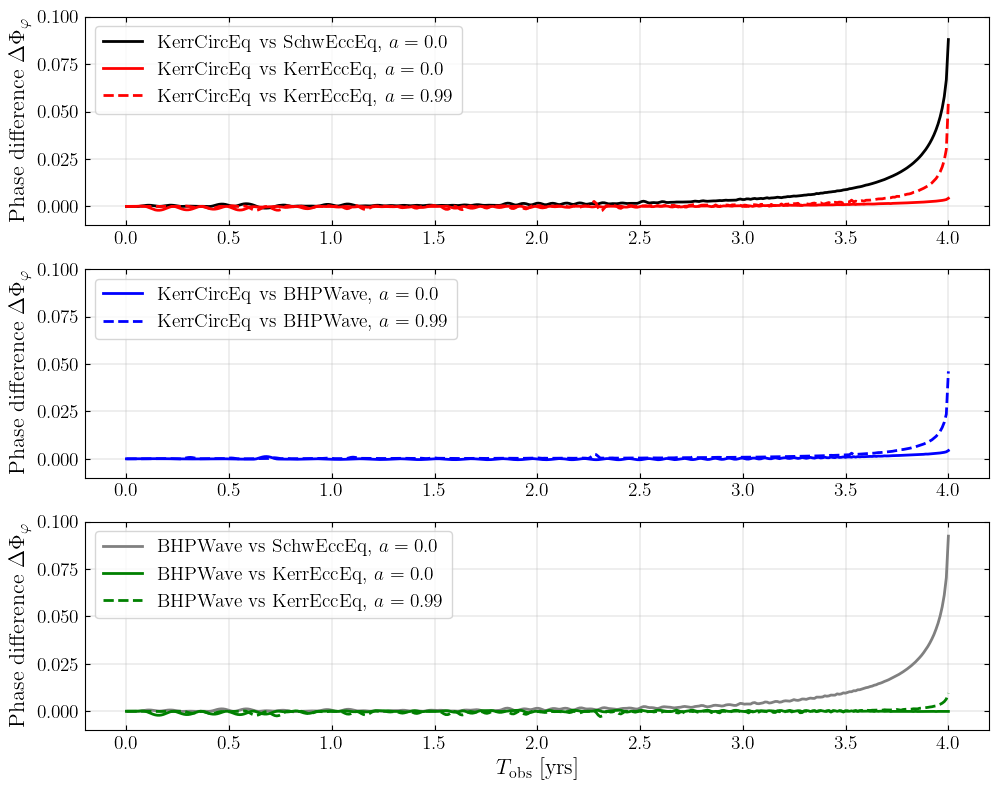

In [199]:
title_fontsize = 20
label_fontsize = 16
tick_fontsize = 14
legend_fontsize = 14
thickness = 2

fig, axes = plt.subplots(3, 1, figsize=(10, 8))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax1.plot(t_plot, δϕH_Fnew , '-k', label='KerrCircEq vs SchwEccEq, $a = 0.0$', linewidth=thickness, rasterized=True)
ax1.plot(t_plot, -δϕh_k , '-r', label='KerrCircEq vs KerrEccEq, $a = 0.0$', linewidth=thickness, rasterized=True)
ax1.plot(t_plot2, -δϕh_k99 , '--r', label='KerrCircEq vs KerrEccEq, $a = 0.99$', linewidth=thickness, rasterized=True)
ax1.grid()
ax1.set_ylabel(r'Phase difference $\Delta \Phi_{\varphi}$', fontsize=label_fontsize)
# ax1.set_xlabel(r'$T_{\rm obs}$ [yrs]', fontsize=label_fontsize)
ax1.legend(fontsize=legend_fontsize)
ax1.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax1.set_ylim(-0.01, 0.1)

ax2.plot(t_plot, -δϕh_z , '-b', label='KerrCircEq vs BHPWave, $a = 0.0$', linewidth=thickness, rasterized=True)
ax2.plot(t_plot2, -δϕh_z99 , '--b', label='KerrCircEq vs BHPWave, $a = 0.99$', linewidth=thickness, rasterized=True)
ax2.grid()
ax2.set_ylabel(r'Phase difference $\Delta \Phi_{\varphi}$', fontsize=label_fontsize)
# ax2.set_xlabel(r'$T_{\rm obs}$ [yrs]', fontsize=label_fontsize)
ax2.legend(fontsize=legend_fontsize, loc='upper left')
ax2.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax2.set_ylim(-0.01, 0.1)


ax3.plot(t_plot, -δϕz_Fnew , '-',color="grey", label='BHPWave vs SchwEccEq, $a = 0.0$', linewidth=thickness, rasterized=True)
ax3.plot(t_plot2, δϕz_k , '-g', label='BHPWave vs KerrEccEq, $a = 0.0$', linewidth=thickness, rasterized=True)
ax3.plot(t_plot2, δϕz_k99 , '--g', label='BHPWave vs KerrEccEq, $a = 0.99$', linewidth=thickness, rasterized=True)
ax3.grid()
ax3.set_ylabel(r'Phase difference $\Delta \Phi_{\varphi}$', fontsize=label_fontsize)
ax3.set_xlabel(r'$T_{\rm obs}$ [yrs]', fontsize=label_fontsize)
ax3.legend(fontsize=legend_fontsize)
ax3.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax3.set_ylim(-0.01, 0.1)

plt.tight_layout()
plt.savefig('Cross_codes_phase_shift.pdf', dpi=300)


## Waveform comparison

In [1]:
# import os
# # print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))
# os.environ["CUDA_VISIBLE_DEVICES"] = "5"
# print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))
import multiprocessing
num_threads =  multiprocessing.cpu_count()


In [2]:
import numpy as np
from matplotlib import pyplot as plt

import few
cfg_set = few.get_config_setter(reset=True)
# cfg_set.enable_backends("cpu")
cfg_set.enable_backends("cuda12x", "cpu")
from few.waveform import GenerateEMRIWaveform, FastKerrEccentricEquatorialFlux
from few.utils.fdutils import GetFDWaveformFromFD, GetFDWaveformFromTD
from few.trajectory.inspiral import EMRIInspiral
from few.trajectory.ode.flux import KerrEccEqFlux
from few.utils.constants import YRSID_SI, MTSUN_SI, Pi
from few.utils.utility import get_mismatch



Kerr_ecc_wave = FastKerrEccentricEquatorialFlux()


from bhpwave.waveform import KerrWaveform
from  bhpwave.trajectory.inspiral import InspiralGenerator
from bhpwave.waveform import scaled_amplitude
import multiprocessing
Zach_gen_Kerr = KerrWaveform()
num_threads_BHPWave = multiprocessing.cpu_count()
traj_BHPWave = InspiralGenerator(trajectory_data=None)
print("num_threads_BHPWave:", num_threads_BHPWave, "num_threads:", num_threads)



num_threads_BHPWave: 96 num_threads: 96


In [20]:
save_dir_path = "/mnt/beegfs/hkhalvati/data_for_KerrEcc_comparison/"
import h5py
import os
p0 = 6.8583#10.0315
file1 = f"Kerr_wave_l10_a0.99_p{p0}_T1_dt2.h5"
file2 = f"Kerr_wave_l15_a0.99_p{p0}_T1_dt2.h5"
with h5py.File(save_dir_path + file1, "r") as f:
    print(f.keys())
    print(f.attrs.keys())
    att_list = list(f.attrs.keys())
    for att in att_list:
        print(att, f.attrs[att])
    wave_KerrCirc_lmax10 = f["Kerr_wave"][:]
with h5py.File(save_dir_path + file2, "r") as f:
    print(f.keys())
    print(f.attrs.keys())
    att_list = list(f.attrs.keys())
    for att in att_list:
        print(att, f.attrs[att])
    wave_KerrCirc_lmax15 = f["Kerr_wave"][:]

<KeysViewHDF5 ['Kerr_wave']>
<KeysViewHDF5 ['M', 'a0', 'mu', 'p0', 'phi', 'theta']>
M 1000000.0
a0 0.99
mu 10.0
p0 6.8583
phi 1.0471975511965976
theta 0.6283185307179586
<KeysViewHDF5 ['Kerr_wave']>
<KeysViewHDF5 ['M', 'a0', 'mu', 'p0', 'phi', 'theta']>
M 1000000.0
a0 0.99
mu 10.0
p0 6.8583
phi 1.0471975511965976
theta 0.6283185307179586


#### from Jonathan : For people running timing results, please do not use the built-in python time library. I’d recommend using the timeit library and perf_counter or default_timer instead

In [14]:
M = 1e6
mu = 1e1
a0 = 0.99
# p0 = 12.0
dt = 2.
Tobs = 1.0
e0 = 0.0
x0 = 1.0
theta = np.pi/5.
phi = np.pi/3.
p0 = 6.8583#10.0315
dist = 1.0
Phi_phi0 = 0.0

lmax = 10
specific_modes = []
for l in range(2,lmax+1):
    for m in range(0,l+1):
        specific_modes += [(l,m,0)]



zach_scaled_amp = scaled_amplitude(mu, dist)
Zach_source = zach_scaled_amp * Zach_gen_Kerr.source_frame(M, mu, a0, p0, theta, phi, Phi_phi0 , dt=dt, T = Tobs,mode_selection=specific_modes,  num_threads=num_threads_BHPWave)



waveform_KerrEcc = Kerr_ecc_wave(M, mu, a0, p0, e0, x0, theta, phi,dt=dt, T=Tobs, dist = dist, mode_selection=specific_modes)
waveform_KerrEcc = waveform_KerrEcc.get()
print("number of modes kept:",Kerr_ecc_wave.num_modes_kept)
waveform_KerrEcc2 = Kerr_ecc_wave(M, mu, a0, p0, e0, x0, theta, phi,dt=dt, T=Tobs, dist = dist, eps=1e-10)
waveform_KerrEcc2 = waveform_KerrEcc2.get()
print("number of modes kept with eps=1e-10:",Kerr_ecc_wave.num_modes_kept)



# plt.figure(figsize=(12,6))
# plt.plot(t_arr[-1000:], waveform_KerrEcc.real[-1000:], label = f"num_modes={Kerr_ecc_wave.num_modes_kept}")
# plt.plot(t_arr[-1000:], waveform_KerrEcc2.real[-1000:],'--', label = f"eps=1e-10, num_modes={Kerr_ecc_wave.num_modes_kept}")
# plt.legend()


number of modes kept: 63
number of modes kept with eps=1e-10: 39


In [21]:
mis_BHPWave_kerrecc = get_mismatch(Zach_source.real, waveform_KerrEcc.real, use_gpu=True)
mis_kerrcir15_kerrecc = get_mismatch(wave_KerrCirc_lmax15, waveform_KerrEcc.real, use_gpu=True)
mis_kerrcir10_kerrecc = get_mismatch(wave_KerrCirc_lmax10, waveform_KerrEcc.real, use_gpu=True)
mis_kerrcirc15_BHPWave = get_mismatch(wave_KerrCirc_lmax15, Zach_source.real, use_gpu=True)
print("mismatch with BHPWave:", mis_BHPWave_kerrecc)
print("mismatch with KerrCirc l=15:", mis_kerrcir15_kerrecc)
print("mismatch with KerrCirc l=10:", mis_kerrcir10_kerrecc)
print("mismatch between KerrCirc l=15 and BHPWave:", mis_kerrcirc15_BHPWave)

mismatch with BHPWave: 0.00023816240518093057
mismatch with KerrCirc l=15: 6.745423007159523e-05
mismatch with KerrCirc l=10: 6.744067987984881e-05
mismatch between KerrCirc l=15 and BHPWave: 0.0005484758375392529


In [22]:
t_arr = np.arange(len(waveform_KerrEcc.real))*dt # in seconds

len(waveform_KerrEcc.real), len(wave_KerrCirc_lmax15), len(Zach_source.real), len(waveform_KerrEcc2.real)

(15779075, 15779075, 15779075, 15779075)

#### One year long waves:

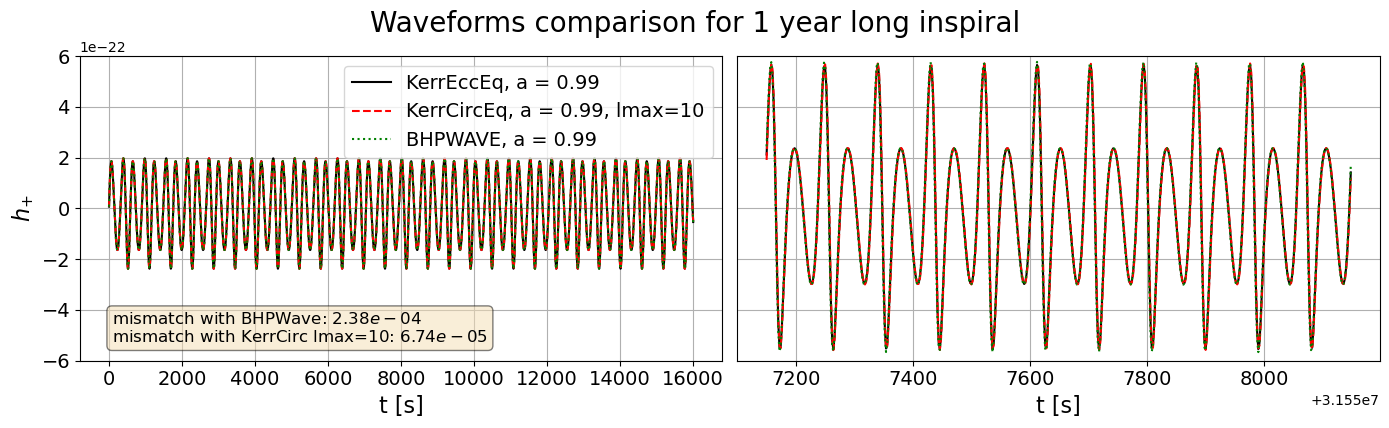

In [28]:
title_fontsize = 20
label_fontsize = 16
tick_fontsize = 14
legend_fontsize = 14
text_fontsize = 12


fig, axes = plt.subplots(1, 2, figsize=(14, 4.5))

# First subplot
axes[0].plot(t_arr[:8000], waveform_KerrEcc[:8000].real, '-k', label='KerrEccEq, a = 0.99')
axes[0].plot(t_arr[:8000], wave_KerrCirc_lmax10[:8000].real, '--r', label='KerrCircEq, a = 0.99, lmax=10')
axes[0].plot(t_arr[:8000], Zach_source[:8000].real, ':g', label='BHPWAVE, a = 0.99')
# axes[0].plot(t_arr[:8000], wave_KerrCirc_lmax15[:8000].real, '-g', label='KerrCircEq, a = 0.99, lmax=15')
axes[0].set_xlabel('t [s]', fontsize=label_fontsize)
axes[0].set_ylabel(r'$h_{\plus}$', fontsize=label_fontsize)
axes[0].set_ylim(-6e-22, 6e-22)
# axes[0].set_title("Beginning of wave", fontsize=title_fontsize)
axes[0].legend(fontsize=legend_fontsize)
axes[0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[0].grid(True)

# Second subplot
axes[1].plot(t_arr[-500:], waveform_KerrEcc[-500:].real, '-k', label='Relativistic circular Kerr ')
axes[1].plot(t_arr[-500:], wave_KerrCirc_lmax10[-500:].real, '--r', label='KerrCircEq, lmax=10')
axes[1].plot(t_arr[-500:], Zach_source[-500:].real, ':g', label='BHPWAVE')
# axes[1].plot(t_arr[-500:], wave_KerrCirc_lmax15[-500:].real, '-g', label='KerrCircEq, lmax=15')
axes[1].set_xlabel('t [s]', fontsize=label_fontsize)
# axes[1].set_ylabel(r'$h_{\plus}$', fontsize=label_fontsize)
axes[1].set_ylim(-6e-22, 6e-22)
# axes[1].set_title("End of wave", fontsize=title_fontsize)
# axes[1].legend(fontsize=legend_fontsize)
axes[1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[1].tick_params(axis='y', left=False, labelleft=False)

axes[1].grid(True)

textstr = f"mismatch with BHPWave: ${mis_BHPWave_kerrecc:.2e}$"
textstr += f"\nmismatch with KerrCirc lmax=10: ${mis_kerrcir10_kerrecc:.2e}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axes[0].text(0.05, 0.05, textstr, transform=axes[0].transAxes, fontsize=text_fontsize,
             verticalalignment='bottom', bbox=props)

fig.suptitle("Waveforms comparison for 1 year long inspiral", fontsize=title_fontsize, y=0.94)


plt.tight_layout()

# plt.savefig("waveforms_comparison.pdf")

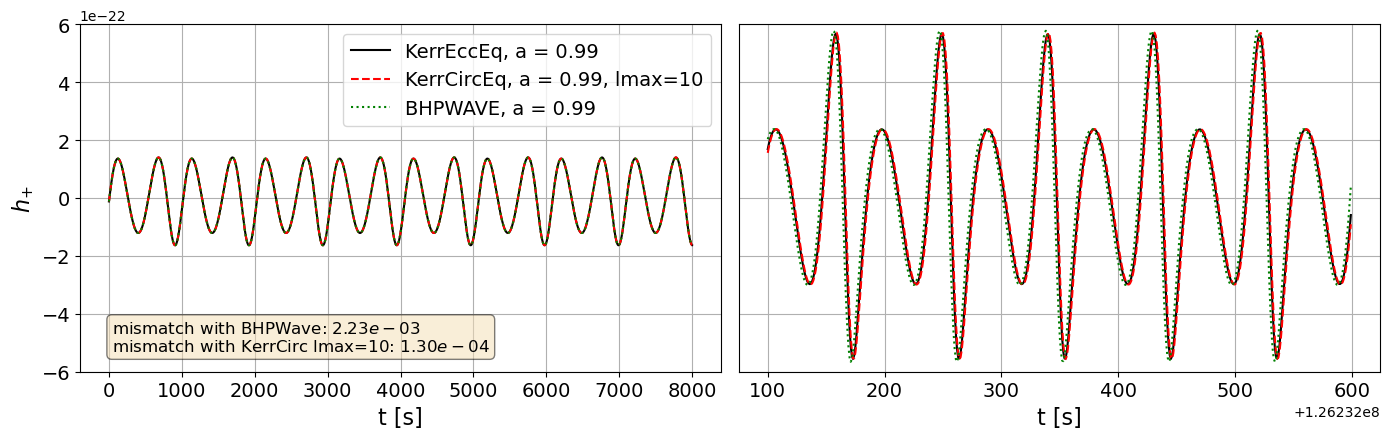

In [ ]:
title_fontsize = 20
label_fontsize = 16
tick_fontsize = 14
legend_fontsize = 14
text_fontsize = 12


fig, axes = plt.subplots(1, 2, figsize=(14, 4.5))

# First subplot
axes[0].plot(t_arr[:8000], waveform_KerrEcc[:8000].real, '-k', label='KerrEccEq, a = 0.99')
axes[0].plot(t_arr[:8000], wave_KerrCirc_lmax10[:8000].real, '--r', label='KerrCircEq, a = 0.99, lmax=10')
axes[0].plot(t_arr[:8000], Zach_source[:8000].real, ':g', label='BHPWAVE, a = 0.99')
# axes[0].plot(t_arr[:8000], wave_KerrCirc_lmax15[:8000].real, '-g', label='KerrCircEq, a = 0.99, lmax=15')
axes[0].set_xlabel('t [s]', fontsize=label_fontsize)
axes[0].set_ylabel(r'$h_{\plus}$', fontsize=label_fontsize)
axes[0].set_ylim(-6e-22, 6e-22)
# axes[0].set_title("Beginning of wave", fontsize=title_fontsize)
axes[0].legend(fontsize=legend_fontsize)
axes[0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[0].grid(True)

# Second subplot
axes[1].plot(t_arr[-500:], waveform_KerrEcc[-500:].real, '-k', label='Relativistic circular Kerr ')
axes[1].plot(t_arr[-500:], wave_KerrCirc_lmax10[-500:].real, '--r', label='KerrCircEq, lmax=10')
axes[1].plot(t_arr[-500:], Zach_source[-500:].real, ':g', label='BHPWAVE')
# axes[1].plot(t_arr[-500:], wave_KerrCirc_lmax15[-500:].real, '-g', label='KerrCircEq, lmax=15')
axes[1].set_xlabel('t [s]', fontsize=label_fontsize)
# axes[1].set_ylabel(r'$h_{\plus}$', fontsize=label_fontsize)
axes[1].set_ylim(-6e-22, 6e-22)
# axes[1].set_title("End of wave", fontsize=title_fontsize)
# axes[1].legend(fontsize=legend_fontsize)
axes[1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[1].tick_params(axis='y', left=False, labelleft=False)

axes[1].grid(True)

textstr = f"mismatch with BHPWave: ${mis_BHPWave_kerrecc:.2e}$"
textstr += f"\nmismatch with KerrCirc lmax=10: ${mis_kerrcir10_kerrecc:.2e}$"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axes[0].text(0.05, 0.05, textstr, transform=axes[0].transAxes, fontsize=text_fontsize,
             verticalalignment='bottom', bbox=props)




plt.tight_layout()

# plt.savefig("waveforms_comparison.pdf")